# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
service = Service(ChromeDriverManager().install())
browser = Browser('chrome', service=service)


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', class_='table')


In [5]:
# Extract all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cols = row.find_all('td')
    mars_weather.append({col.text.strip() for col in cols})
    
    
    

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Get the column names from the first row
headers = []
for th in rows[0].find_all('th'):
    headers.append(th.text.strip())
    
# Create and empty list to store the row data
mars_data = []

# Loop through each row of the table.
for row in rows[1:]:
    cols = row.find_all('td')
    col_data = [col.text.strip() for col in cols]
    mars_data.append(col_data)
    
# Create a Pandas DataFrame
mars_weather_df = pd.DataFrame(mars_data, columns=headers)



In [8]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,155,-75.0,10,739.0,2,2012-08-16,6
1,2012-08-17,-76.0,740.0,6,11,156,13
2,-76.0,12,741.0,6,2012-08-18,156,24
3,732.0,2012-08-19,6,157,-74.0,35,13
4,740.0,46,14,6,2012-08-20,157,-74.0
...,...,...,...,...,...,...,...
1862,2018-02-23,730.0,1973,1889,-78.0,5,133
1863,2018-02-24,1892,-77.0,1974,5,729.0,134
1864,-76.0,1975,1894,2018-02-25,5,729.0,134
1865,2018-02-26,1893,728.0,-77.0,135,5,1976


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
print(mars_weather_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [14]:
 # Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)



In [15]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)



id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [36]:
# 1. How many months are there on Mars?
# Find the number of unique months
num_months = mars_weather_df['month'].nunique()
print(f"There are {num_months} months on Mars.")

# Display the unique months to verify
print("\nUnique Months:")
print(sorted(mars_weather_df['month'].unique()))


There are 12 months on Mars.

Unique Months:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [37]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df['sol'].nunique()
print(f"There are {num_sols} Martian days (sols) worth of data in the dataset.")

# Show the range of sols
min_sol = mars_weather_df['sol'].min()
max_sol = mars_weather_df['sol'].max()
print(f"The range of Martian days (sols) in the dataset is from {min_sol} to {max_sol}.")




There are 1867 Martian days (sols) worth of data in the dataset.
The range of Martian days (sols) in the dataset is from 10 to 1977.


In [38]:
# 3. What is the average minimum temperature by month?

# Calculate the average minimum temperature by month
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()




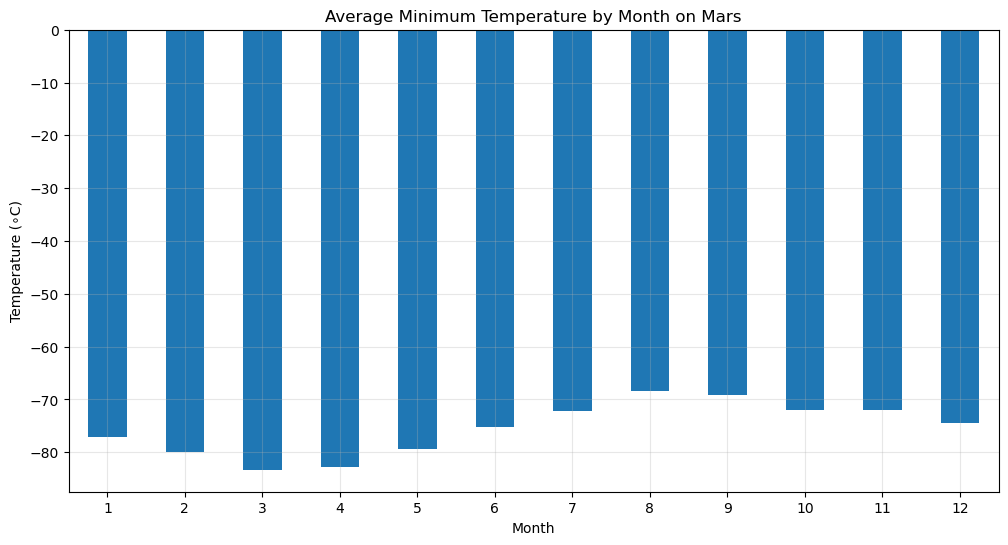

In [39]:
# Plot the average minimum temperature by month
plt.figure(figsize=(12, 6))
avg_min_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (∘C)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

plt.show()


In [40]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_temps = avg_min_temp_by_month.sort_values()
print("\nColdest month: Month {}, {:.1f}°C".format(sorted_temps.index[0], sorted_temps.iloc[0]))
print("Hottest month: Month {}, {:.1f}∘C".format(sorted_temps.index[-1], sorted_temps.iloc[-1]))



Coldest month: Month 3, -83.3°C
Hottest month: Month 8, -68.4∘C


In [41]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Sort the pressure to identify the lowest and highest pressure months
sorted_pressure = avg_pressure_by_month.sort_values()

print("Average pressure by month:")
print(avg_pressure_by_month)



Average pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


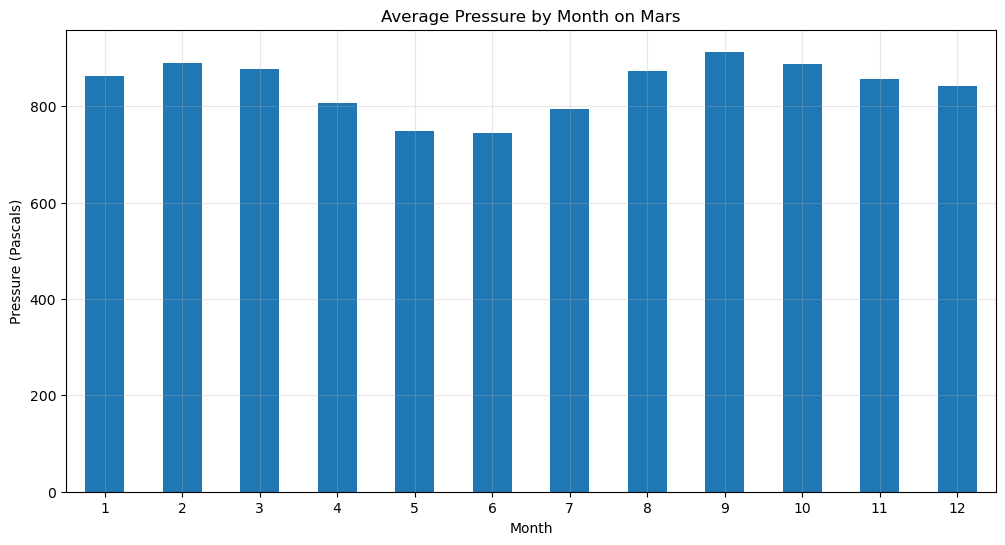

In [42]:
# Plot the average pressure by month
plt.figure(figsize=(12, 6))
avg_pressure_by_month.plot(kind='bar')
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure (Pascals)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.show()


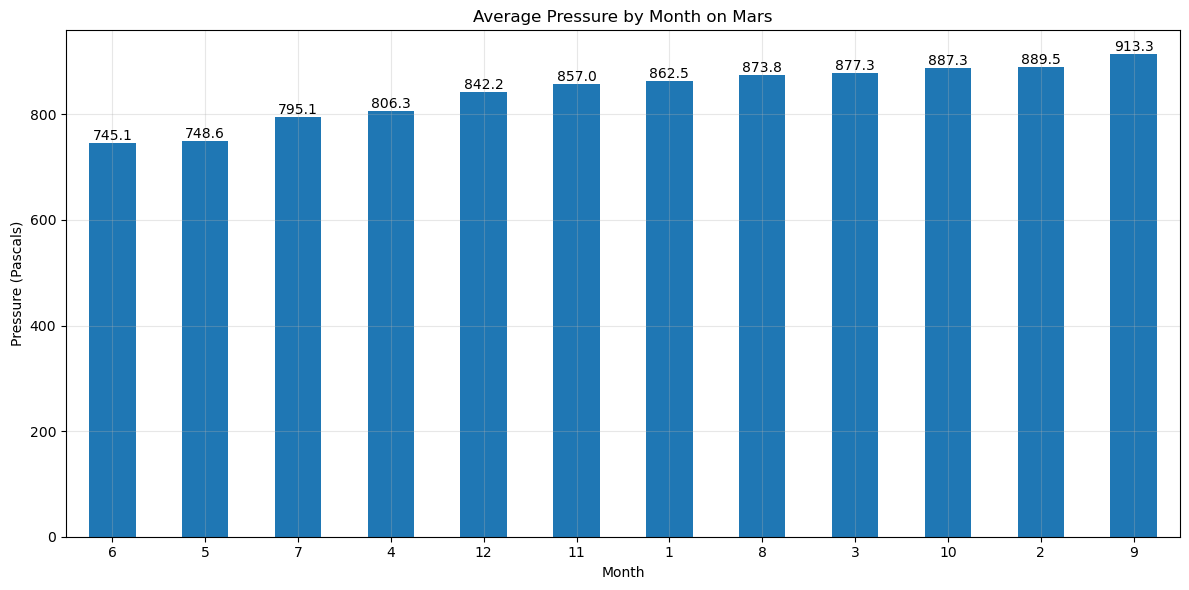

Average Pressure by Month (Sorted from Lowest to Highest):
MOnth 6: 745.1 Pa
MOnth 5: 748.6 Pa
MOnth 7: 795.1 Pa
MOnth 4: 806.3 Pa
MOnth 12: 842.2 Pa
MOnth 11: 857.0 Pa
MOnth 1: 862.5 Pa
MOnth 8: 873.8 Pa
MOnth 3: 877.3 Pa
MOnth 10: 887.3 Pa
MOnth 2: 889.5 Pa
MOnth 9: 913.3 Pa

Month with Lowest Pressure: 6 (745.1 Pa)
Month with Highest Pressure: 9 (913.3 Pa)


In [43]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the average pressure by month to identify lowest and highest pressure months
sorted_pressure = avg_pressure_by_month.sort_values()

#Create a bar plot of sorted pressure data
plt.figure(figsize=(12, 6))
sorted_pressure.plot(kind='bar')
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure (Pascals)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

# Value labels on top of each bar
for i, v in enumerate(sorted_pressure):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')
             

plt.tight_layout()
plt.show()

# Print results
print("Average Pressure by Month (Sorted from Lowest to Highest):")
for month, pressure in sorted_pressure.items():
    print(f"MOnth {month}: {pressure:.1f} Pa")

print("\nMonth with Lowest Pressure:", sorted_pressure.index[0], f"({sorted_pressure.iloc[0]:.1f} Pa)")
print("Month with Highest Pressure:", sorted_pressure.index[-1], f"({sorted_pressure.iloc[-1]:.1f} Pa)")




Data Collection Period:
First Date: 2012-08-16
Last Date: 2018-,-27
Total Days in Dataset: 2021
Looking at the temperature cycles in the plot, we can see that a complete cycle
(representing one Martian year) takes about 687 Earth days.
This matches NASA's official measurement that mars takes 687 Earth days to orbit the sun.


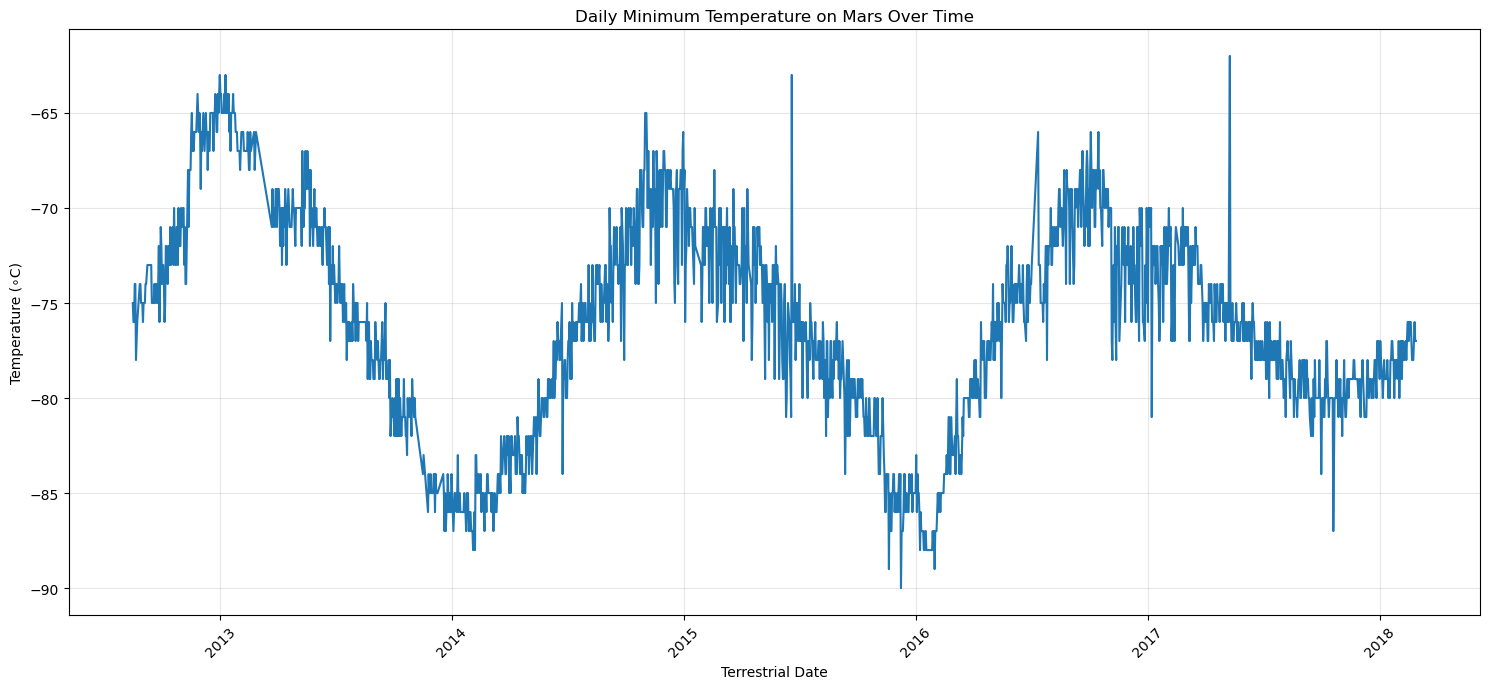

In [44]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

first_date = mars_weather_df['terrestrial_date'].min()
last_date = mars_weather_df['terrestrial_date'].max()
total_days = (last_date - first_date).days

print("Data Collection Period:")
print(f"First Date: {first_date.strftime('%Y-%m-%d')}")
print(f"Last Date: {last_date.strftime('%Y-%,-%d')}")
print(f"Total Days in Dataset: {total_days}")

print("Looking at the temperature cycles in the plot, we can see that a complete cycle")
print("(representing one Martian year) takes about 687 Earth days.")
print("This matches NASA's official measurement that mars takes 687 Earth days to orbit the sun.")


# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(15, 7))
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'])
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Temperature (∘C)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



#### Minimum Temperature
The minimum temperatures on Mars at Curiosity's location show significant variation

The data shows a clear seasonal cycle in temperature

Temperatures follow a predictable pattern throughout the Martian year

There's a clear correlation between solar longitude (ls) and temperature






#### Atmospheric Pressure

The atmospheric pressure on Mars varies significantly throughout the year

These cycles align with the 687-day Martian year

There's a consistent seasonal pattern in pressure changes



#### Year Length

One Martian year is approximately 687 Earth days

Temperature cycles show clear periodic patterns

The patterns are consistent with Mars' seasonal changes



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [45]:
# Write the data to a CSV
mars_weather_df.to_csv('Mars_Weather_Data.csv', index=False)
print(f"Number of rows exported: {len(mars_weather_df)}")
print(f"Columns in the DataFrame: {', '.join(mars_weather_df.columns)}")




Number of rows exported: 1867
Columns in the DataFrame: id, terrestrial_date, sol, ls, month, min_temp, pressure


In [46]:
browser.quit()